In [35]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, X, Y, tau):
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X] 
    xw = X.T * weighting_function(x0, X, tau)
    # This beta is calculated using the minimised value found by the normal equation
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    
    return x0 @ beta

def weighting_function(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

In [20]:
n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.log(np.abs(X ** 2 - 1) + .5)
# jitter X
X += np.random.normal(scale=.1, size=n)

In [31]:
def plot_lwr(tau):
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(domain, prediction)

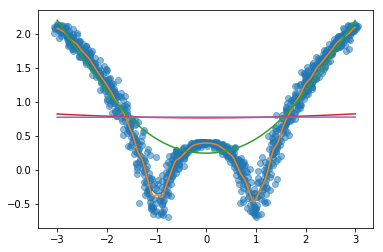

In [32]:
plt.scatter(X, Y, alpha = 0.5)
plot_lwr(0.1)
plot_lwr(0.05)
plot_lwr(1.0)
plot_lwr(10)
plot_lwr(100)

In [28]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('/Users/bhanubhandari/Downloads/Housing.csv', index_col='Unnamed: 0')
df.head()


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [33]:
x = df[['lotsize','bedrooms','bathrms', 'stories', 'garagepl']]
y = df['price']
print(x)

     lotsize  bedrooms  bathrms  stories  garagepl
1       5850         3        1        2         1
2       4000         2        1        1         0
3       3060         3        1        1         0
4       6650         3        1        2         0
5       6360         2        1        1         0
6       4160         3        1        1         0
7       3880         3        2        2         2
8       4160         3        1        3         0
9       4800         3        1        1         0
10      5500         3        2        4         1
11      7200         3        2        1         3
12      3000         2        1        1         0
13      1700         3        1        2         0
14      2880         3        1        1         0
15      3600         2        1        1         0
16      3185         2        1        1         0
17      3300         3        1        2         1
18      5200         4        1        3         0
19      3450         1        1

In [34]:
x_1 = pd.cut(x,20)

ValueError: Input array must be 1 dimensional